# Assignment 1 KNN for IRIS Classification

This is the coding material that we will use to learn how to write code to perform exploratory data analysis and K-Nearest Neighbor classification for IRIS dataset. Each week, our class will be a combination of lectures and hands-on labs. Currently, this code is incomplete and can not be compiled yet. We will write the code together step-by-step in our class. This assignment has a total of 23 points. Each "ToDO" part in the code comment is one question and
I have labeled the point to each question. The tentative due date for this assignment is 9 PM on Feb 13th. If I am behind my lecture schedule, extensions will be given accordingly. Please save the name of this assignment file as ``340Assign1_Firstname_Lastname.ipynb" (worth 1 point here) and submit it on Canvas. 

# Load the IRIS Dataset

In [1]:
# load the dataset
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [26]:
# get class name for iris_dataset in python
# use type() function
type(iris_dataset)

sklearn.utils.Bunch

In [3]:
# load_iris is a Bunch object, which is similar to a dictionary with keys and values
# print the keys of iris_dataset.keys()
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
# read the description of the dataset by using 'DESCR'
iris_dataset['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [5]:
# show the first few lines of the target
print("First five rows of data:\n", iris_dataset['target'][:5])

First five rows of data:
 [0 0 0 0 0]


In [6]:
# get the unique value of the target variable
import numpy as np
# use np.unique() function to get all the unique values of the target variable
# and print the result out
print("First five rows of data:\n", iris_dataset['target'][:5])
import numpy as np
print(np.unique(iris_dataset['target']))
print("Target Names:", iris_dataset['target_names'])
# show the first few lines of the dataset
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [0 0 0 0 0]
[0 1 2]
Target Names: ['setosa' 'versicolor' 'virginica']
First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [7]:
# print the target names
print("Target Names:", iris_dataset['target_names'])
# show the first few lines of the dataset
print("First five rows of data:\n", iris_dataset['data'][:5])

Target Names: ['setosa' 'versicolor' 'virginica']
First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


# Split Data into Training and Testing Data

In [9]:
from sklearn.model_selection import train_test_split
# Split training and testing dataset
# explain train_size and random_state to students
# put features first, then target labels, set train_size to 0.75, random_state=0
######################### ToDO #################################################
## 2 points
X = iris_dataset['data']
y = iris_dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [10]:
# print the dimension of the training data and testing data
######################### ToDO #################################################
## 1 point
X_train.shape

(112, 4)

In [11]:
# get the type of X_train, X_test, y_train, y_test
type(X_train)

numpy.ndarray

In [27]:
######################### ToDO #################################################
# create Pandas dataframe from data in X_train
# label the column using the strings in iris_dataset.feature_names (use columns argument)
## 1 point
import pandas as pd
iris_dataframe = pd.DataFrame(X_train,columns=iris_dataset['feature_names'])
# show the first 5 lines of the dataset
iris_dataframe.head(5)
iris_dataframe.shape

(112, 4)

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

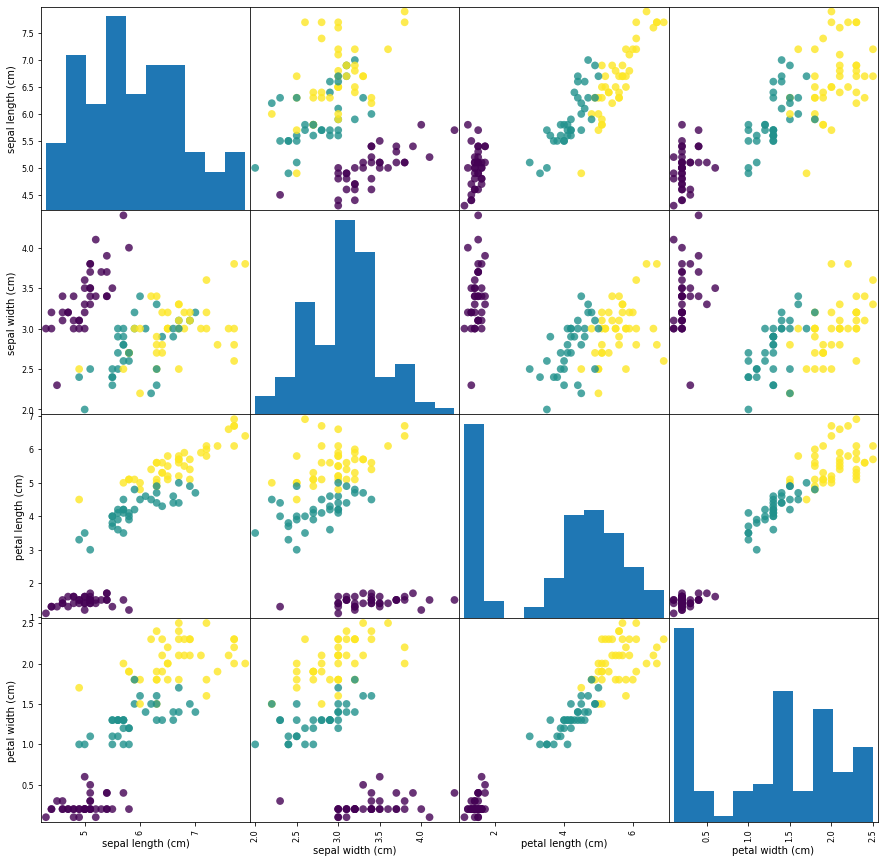

In [13]:
# create a scatter matrix from the dataframe color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', s=60, alpha=0.8)

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=5f6c0f5228048739c4b75c8b7d6a14f1adb86bcbcbec0c6fd41172f517fe96ca
  Stored in directory: c:\users\student\appdata\local\pip\cache\wheels\df\30\8a\1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

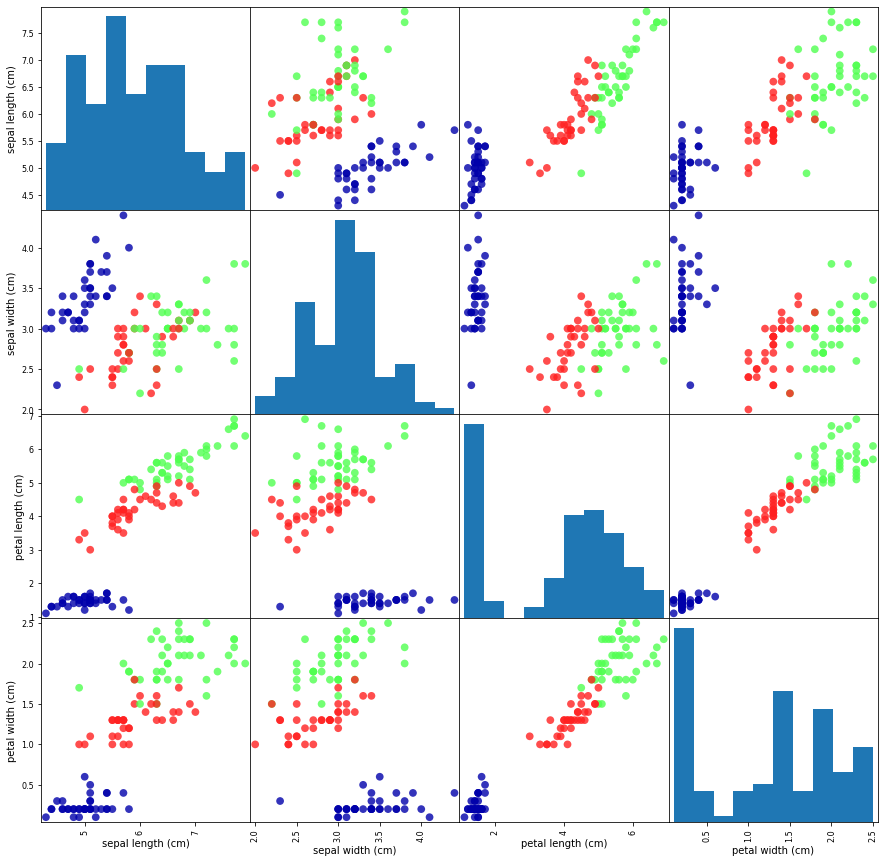

In [14]:
!pip install mglearn
import mglearn
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', s=60, alpha=0.8, cmap=mglearn.cm3)

# First Model: K-Neareast Neighbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier
######################### ToDO #################################################
# define a knn object from KNeighborsClassier class
# set the number of neighbors as one by using n_neighbors
## 2 point
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
######################### ToDO #################################################
# use fit() method of the defined object knn to fit with 
# the training data X_train and y_train
## 2 point
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

 # Making Predictions for New Observations

In [18]:
# create one new observation
import numpy as np
X_new = np.array([5., 29, 1, 0.2])
print("X_new.shape:", X_new.shape)
## if use the current X_new, there will be an error when running prediction
X_new = np.array([[5., 29, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (4,)
X_new.shape: (1, 4)


In [19]:
######################### ToDO #################################################
# use predict() method of the defined object knn to make predictions with X_new
# make predictions 
# 1 point
prediction = knn.predict(X_new)
print("prediction", prediction)

prediction [0]


In [20]:
# print target name
print('Predicted target name:', iris_dataset['target_names'][prediction])

Predicted target name: ['setosa']


# Evaluating the Model

In [21]:
######################### ToDO #################################################
# use predict() method of knn to make predictions for all the observations in the test set
# 1 point
y_pred = knn.predict(X_test) 
print("Test set prediction:\n:", y_pred)

Test set prediction:
: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [22]:
######################### ToDO #################################################
# evaluate the model in terms of accuracy
# 2 points
# obtain the accuracy of the fitted model for the test datast using 
# np.mean() function
accuracy = np.mean(y_test==y_pred)
print("Test set score:", accuracy)

Test set score: 0.9736842105263158


In [ ]:
# print the accurarcy in 2 decimal digits
print("Test set score: {:.2f}".format(accuracy)

In [24]:
######################### ToDO #################################################
# evaluate the model in terms of accuracy
# apply the score function of knn on X_test, y_test
# 1 points
score = knn.score(X_test, y_test)
print("Test set score : {:.2f}".format(score))

Test set score : 0.97


What is the meaning of test set score? Is the fitted model reliable?  (2 points)
* The score is the accuracy if the testing set. We know it is reliable because the accuracy is .97 which is very good

# Summary and Outlook

1. What tasks have we performed using this dataset? Is it a supervised learning task or an unsupervised learning task? (1 points)
* Fist off we loaded in the dataset. We have made sure that we changed it into a pandas dataframe, created graphs, split the data into training and testing, use it to make predictions, and evaluate the model. This is supervised learning
2. Why do we split the data into training and testing sets? (1 point)
* We split it into training and testing so that the model doesn't overfit. In other words it uses the training set to allow for the model to work so that you can test with the testing set

What if we change the number of neighbors to int($\sqrt{n}$), where $n$ is the number of sampels in the training dataset.

In [29]:
######################### ToDO #################################################
## 5 points
## define a new knn_new classifier and set the number of neighbour as int(sqrt(n))
## Hint: when the number of neighbours n_neighbors=1, we define a knn classifier by
## classifier knn = KNeighborsClassifier(n_neighbors=1)

# first get the number of samples of the training set
from math import sqrt

n = len(X_train)
print(n)
# obtain the number of neighbours
k = int(sqrt(n))
print(k)
# define the new knn_new classifier object
knn_new =  KNeighborsClassifier(n_neighbors=k)

# Use the new classifier knn_new to train X_train and y_train
knn_new.fit(X_train, y_train)
new_predict = knn_new.predict(X_test)

# evaluate your new classifier knn_new in terms of prediction accuracy using X_test and y_test
### Model evaluation

accuracy_new = knn_new.score(X_test, y_test)
print("Test set score : {:.2f}".format(accuracy_new))


112
10
Test set score : 0.97
